For keeping the notebook clean will be using warnings library

In [67]:
import warnings
warnings.filterwarnings("ignore")

Will be using polar instead of pandas this time

In [68]:
import pandas as pd
import numpy as np

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

For Model Training Purposes

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [71]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [73]:
df.shape

(6607, 20)

In [74]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [75]:
df.isna().sum().sum()

np.int64(235)

In [76]:
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


In [77]:
df.shape

(6607, 20)

In [78]:
len(df.columns)

20

<Axes: xlabel='Hours_Studied', ylabel='Count'>

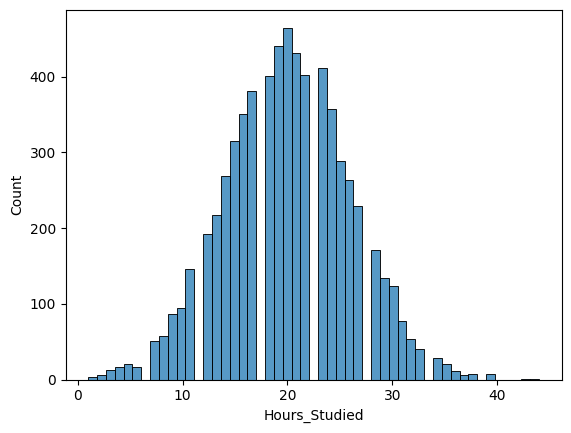

In [155]:
sns.histplot(df['Hours_Studied'])

<Axes: xlabel='Motivation_Level', ylabel='Count'>

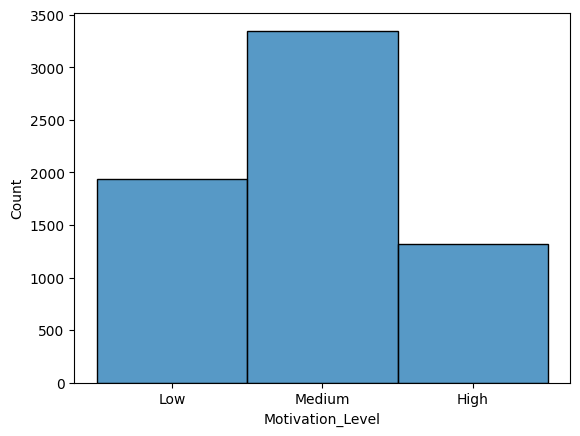

In [161]:
sns.histplot(df['Motivation_Level'])

<Axes: xlabel='Peer_Influence', ylabel='Count'>

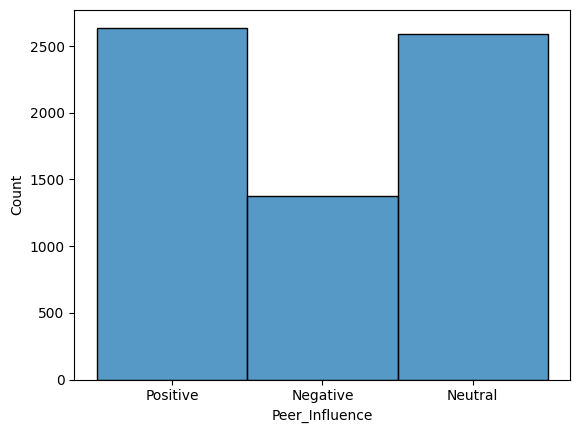

In [163]:
sns.histplot(df['Peer_Influence'])

In [79]:
df['Exam_Score']

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6607, dtype: int64

In [80]:
null_counts = df.isnull().sum()
column_with_most_nulls = null_counts.idxmax()
print(column_with_most_nulls)

Parental_Education_Level


In [81]:
df = df.drop('Parental_Education_Level', axis=1)

In [82]:
df.shape

(6607, 19)

In [83]:
null_counts1 = df.isnull().sum()
column_with_most_nulls1 = null_counts1.idxmax()
print(column_with_most_nulls1)

Teacher_Quality


In [84]:
df = df.drop('Teacher_Quality', axis=1)

In [85]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Public,Positive,3,No,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,Negative,4,No,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,Neutral,4,No,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,Negative,4,No,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,Public,Neutral,4,No,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Public,Positive,2,No,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,Public,Positive,2,No,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Public,Negative,2,No,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Private,Positive,3,No,Far,Female,68


In [86]:
df.isna().sum().sum()

np.int64(67)

In [87]:
null_counts2 = df.isna().sum()
column_with_most_nulls2 = null_counts2.idxmax()
print(column_with_most_nulls2)

Distance_from_Home


In [88]:
df.dtypes['Distance_from_Home']

dtype('O')

mode()[0] bcz it will fill the missing vals with the max occurance of the first if near/far/moderate has a tie in occurance it will fill with near 

In [89]:
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [90]:
df['Distance_from_Home'].isna().sum()

np.int64(0)

In [91]:
df.isna().sum().sum()

np.int64(0)

Preprocessing is now complete and now we will move onto variables set up and then training

Our target here is score, so it will be y
and other variables will be treated as X

In [92]:
X = df.drop(columns= 'Exam_Score')
y = df['Exam_Score']

In [93]:
X.shape

(6607, 17)

In [94]:
y.shape

(6607,)

In [95]:
X.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Distance_from_Home            object
Gender                        object
dtype: object

In [96]:
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Gender
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Public,Positive,3,No,Near,Male
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,Negative,4,No,Moderate,Female
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,Neutral,4,No,Near,Male
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,Negative,4,No,Moderate,Male
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,Public,Neutral,4,No,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Public,Positive,2,No,Near,Female
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,Public,Positive,2,No,Near,Female
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Public,Negative,2,No,Near,Female
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Private,Positive,3,No,Far,Female


In [97]:
distance_from_home = {'Near': 0,
                      'Moderate': 1,
                      'Far': 2}

In [98]:
X['Distance_from_Home'] = X['Distance_from_Home'].map(distance_from_home)

<Axes: xlabel='Distance_from_Home', ylabel='Count'>

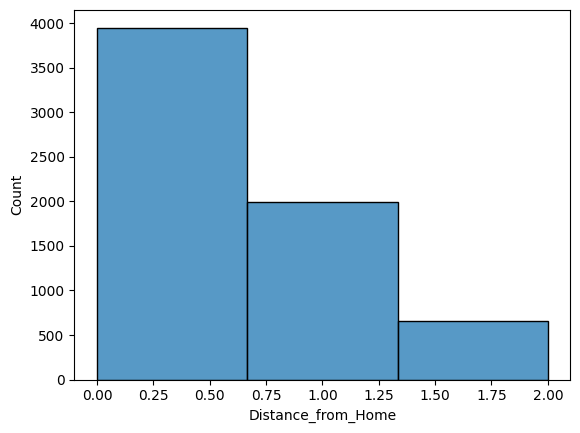

In [164]:
sns.histplot(X['Distance_from_Home'], bins=3)

In [99]:
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Gender
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Public,Positive,3,No,0,Male
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,Negative,4,No,1,Female
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,Neutral,4,No,0,Male
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,Negative,4,No,1,Male
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,Public,Neutral,4,No,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Public,Positive,2,No,0,Female
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,Public,Positive,2,No,0,Female
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Public,Negative,2,No,0,Female
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Private,Positive,3,No,2,Female


In [100]:
X['Gender'].dtype

dtype('O')

In [101]:
X['School_Type'].dtype

dtype('O')

In [102]:
X.isna().sum().sum()

np.int64(0)

In [103]:
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Gender
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Public,Positive,3,No,0,Male
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,Negative,4,No,1,Female
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,Neutral,4,No,0,Male
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,Negative,4,No,1,Male
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,Public,Neutral,4,No,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Public,Positive,2,No,0,Female
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,Public,Positive,2,No,0,Female
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Public,Negative,2,No,0,Female
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Private,Positive,3,No,2,Female


strip() method removes any leading, and trailing whitespaces.

In [104]:
ordinal_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
ordinal_cols = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income']

for col in ordinal_cols:
    X[col] = X[col].str.strip().map(ordinal_mapping)

In [105]:
binary_mapping = {'Yes': 1, 'No': 0}
binary_cols = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']

for col in binary_cols:
    X[col] = X[col].str.strip().map(binary_mapping)

In [111]:
pos_neg_neu_mapping = {'Negative':0, 'Neutral':1, 'Positive': 2}
pos_neg_neu_mapping_cols = ['Peer_Influence']

for col in pos_neg_neu_mapping_cols:
    X[col] = X[col].str.strip().map(pos_neg_neu_mapping)

In [112]:
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Gender
0,23,84,0,2,0,7,73,0,1,0,0,Public,2,3,0,0,Male
1,19,64,0,1,0,8,59,0,1,2,1,Public,0,4,0,1,Female
2,24,98,1,1,1,7,91,1,1,2,1,Public,1,4,0,0,Male
3,29,89,0,1,1,8,98,1,1,1,1,Public,0,4,0,1,Male
4,19,92,1,1,1,6,65,1,1,3,1,Public,1,4,0,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,Public,2,2,0,0,Female
6603,23,76,2,1,0,8,81,1,1,3,0,Public,2,2,0,0,Female
6604,20,90,1,0,1,6,65,0,1,3,0,Public,0,2,0,0,Female
6605,10,86,2,2,1,6,91,2,1,2,0,Private,2,3,0,2,Female


In [107]:
from sklearn.preprocessing import OneHotEncoder

In [108]:
nominal_cols = ['Gender', 'School_Type']

In [113]:
encoder = OneHotEncoder(sparse_output=False, drop='first') 

In [114]:
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Gender
0,23,84,0,2,0,7,73,0,1,0,0,Public,2,3,0,0,Male
1,19,64,0,1,0,8,59,0,1,2,1,Public,0,4,0,1,Female
2,24,98,1,1,1,7,91,1,1,2,1,Public,1,4,0,0,Male
3,29,89,0,1,1,8,98,1,1,1,1,Public,0,4,0,1,Male
4,19,92,1,1,1,6,65,1,1,3,1,Public,1,4,0,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,Public,2,2,0,0,Female
6603,23,76,2,1,0,8,81,1,1,3,0,Public,2,2,0,0,Female
6604,20,90,1,0,1,6,65,0,1,3,0,Public,0,2,0,0,Female
6605,10,86,2,2,1,6,91,2,1,2,0,Private,2,3,0,2,Female


In [115]:
encoder_array = encoder.fit_transform(X[nominal_cols])

In [116]:
dummy_cols = encoder.get_feature_names_out(nominal_cols)

In [117]:
encoder_df = pd.DataFrame(encoder_array, columns=dummy_cols, index=X.index)

In [118]:
X = X.drop(columns=nominal_cols)

In [119]:
X = pd.concat([X, encoder_df], axis=1)

In [120]:
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Gender_Male,School_Type_Public
0,23,84,0,2,0,7,73,0,1,0,0,2,3,0,0,1.0,1.0
1,19,64,0,1,0,8,59,0,1,2,1,0,4,0,1,0.0,1.0
2,24,98,1,1,1,7,91,1,1,2,1,1,4,0,0,1.0,1.0
3,29,89,0,1,1,8,98,1,1,1,1,0,4,0,1,1.0,1.0
4,19,92,1,1,1,6,65,1,1,3,1,1,4,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,2,2,0,0,0.0,1.0
6603,23,76,2,1,0,8,81,1,1,3,0,2,2,0,0,0.0,1.0
6604,20,90,1,0,1,6,65,0,1,3,0,0,2,0,0,0.0,1.0
6605,10,86,2,2,1,6,91,2,1,2,0,2,3,0,2,0.0,0.0


<Axes: xlabel='Gender_Male', ylabel='count'>

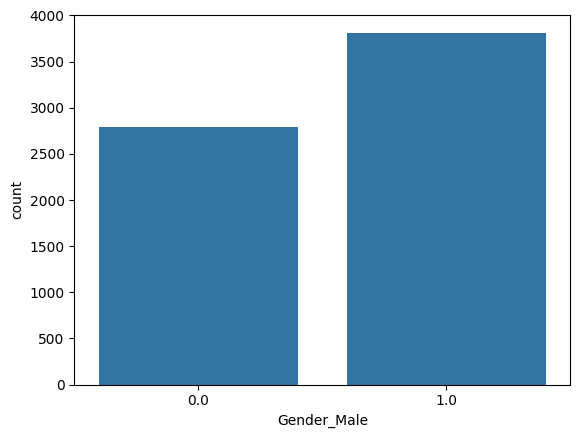

In [165]:
sns.countplot(x='Gender_Male', data=X)

In [167]:
print('Hours_Studied' in df.columns, 'Exam_Score' in df.columns)
print(df[['Hours_Studied','Exam_Score']].dtypes)
print(df[['Hours_Studied','Exam_Score']].head())

True True
Hours_Studied    int64
Exam_Score       int64
dtype: object
   Hours_Studied  Exam_Score
0             23          67
1             19          61
2             24          74
3             29          71
4             19          70


<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

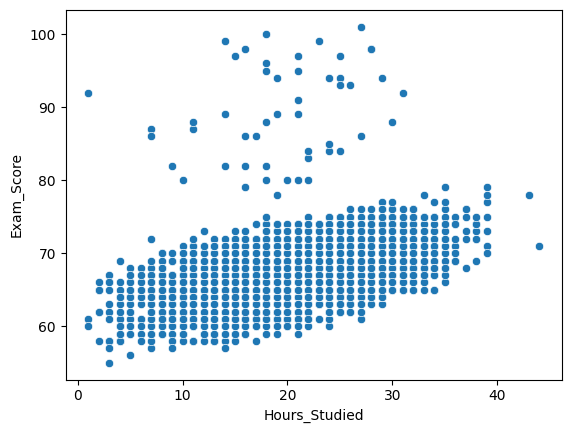

In [168]:
sns.scatterplot(x=df['Hours_Studied'], y=df['Exam_Score'])

In [151]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
rf_model = RandomForestRegressor(
    n_estimators=100,       
    random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f"{y_pred[:5]}")
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

[65.08 66.22 70.19 66.03 66.84]


In [152]:
print(f"R² score: {r2:.3f}")

R² score: 0.661


In [169]:
from sklearn.metrics import (mean_absolute_error, mean_squared_error)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [170]:
print(mae)
print(rmse)

1.1059682299546143
2.188260747336993


In [171]:
from xgboost import XGBRegressor

In [172]:
xgb_model = XGBRegressor(
    n_estimators=200,     
    learning_rate=0.1,        
    max_depth=4,          
    random_state=42)

xgb_model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [173]:
y_pred = xgb_model.predict(X_test)

In [174]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [175]:
print(f"XGBoost R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

XGBoost R²: 0.723
MAE: 0.829
RMSE: 1.977


In [176]:
import lightgbm as lgb

In [177]:
lgb_model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42)

In [178]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 5285, number of used features: 17
[LightGBM] [Info] Start training from score 67.215137
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [179]:
y_pred = lgb_model.predict(X_test)

In [180]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [181]:
print(f"LightGBM R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

LightGBM R²: 0.703
MAE: 0.908
RMSE: 2.048


In [182]:
results = {
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'R2': [0.661, 0.723, 0.703],        
    'MAE': [1.105, 0.829, 0.908],          
    'RMSE': [2.188, 1.977, 2.048]          
}

metrics_df = pd.DataFrame(results)
metrics_df

,Model,R2,MAE,RMSE
0,Random Forest,0.661,1.105,2.188
1,XGBoost,0.723,0.829,1.977
2,LightGBM,0.703,0.908,2.048


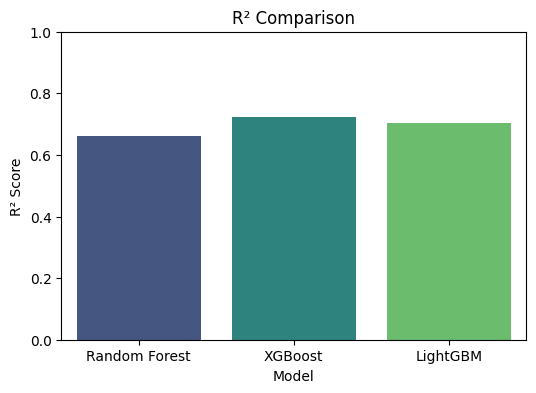

In [183]:
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='R2', data=metrics_df, palette='viridis')
plt.ylim(0,1)
plt.title('R² Comparison')
plt.ylabel('R² Score')
plt.show()

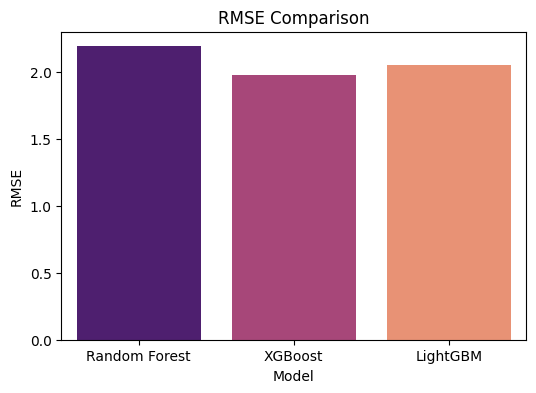

In [184]:
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='magma')
plt.title('RMSE Comparison')
plt.show()

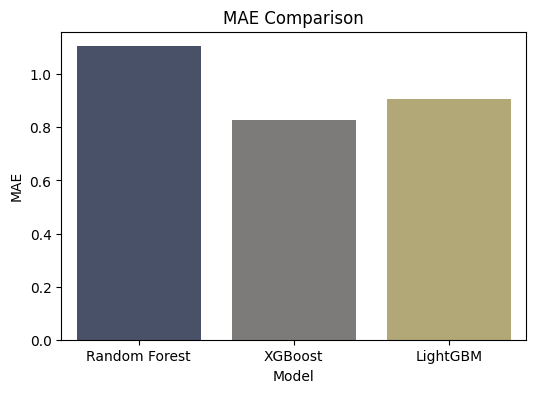

In [185]:
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='MAE', data=metrics_df, palette='cividis')
plt.title('MAE Comparison')
plt.show()

In [186]:
import joblib

In [187]:
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [188]:
ordinal_mappings = {
    'Distance_from_Home': {'Near':0,'Moderate':1,'Far':2},
    'Parental_Involvement': {'Low':0,'Medium':1,'High':2},
    'Access_to_Resources': {'Low':0,'Medium':1,'High':2},
    # Add other ordinal columns
}

joblib.dump(ordinal_mappings, 'ordinal_mappings.pkl')

['ordinal_mappings.pkl']

In [189]:
onehot_columns = ['Gender_Male', 'School_Type_Private']  # whatever columns were created
joblib.dump(onehot_columns, 'onehot_columns.pkl')

['onehot_columns.pkl']